# k-Means Clustering (kNN) model <br><br>

k-Means Clustering is a popular unsupervised machine learning algorithm that is useful in various scenarios:<br><br>

1. Unlabeled Data: When you have a dataset without any predefined labels or categories, k-means clustering can help discover underlying patterns and groupings in the data.<br>

2. Clustering Similar Data Points: k-means is effective in clustering data points that are similar to each other. It aims to partition the data into clusters in such a way that data points within the same cluster are closer to each other in feature space.<br>

3. Exploratory Data Analysis: k-means clustering can be used as an exploratory tool to gain insights into the structure of the data. By visualizing the clusters, you can understand the natural groupings and relationships within the dataset.<br>

4. Customer Segmentation: In marketing and customer analytics, k-means is used to segment customers into distinct groups based on their purchasing behavior, preferences, demographics, etc. This helps in targeted marketing strategies and personalized customer experiences.<br>

5. Anomaly Detection: k-means can be used for detecting anomalies or outliers in the data. Data points that do not belong to any of the well-defined clusters can be considered as anomalies.<br>

6. Image Compression: In image processing, k-means clustering can be used for image compression by reducing the number of colors in an image. It groups similar colors together, thereby reducing the overall size of the image.<br>

7. Feature Engineering: k-means can be used as a feature engineering technique to create new features based on the cluster assignments. These new features can then be used as input for other machine learning models.<br>

8. Recommendation Systems: In recommendation systems, k-means clustering can be used to group similar items or users. This helps in making personalized recommendations based on the preferences of similar users or items.<br>

9. Market Segmentation: In market research and business analytics, k-means clustering is used to segment markets into distinct groups based on various attributes such as income, age, buying preferences, etc.<br>

10. Genetic Analysis: In biology and genetics, k-means clustering can be used to cluster genes or proteins based on their expression levels. This helps in understanding gene functions and identifying biomarkers.<br>

11. Document Clustering: In natural language processing (NLP), k-means clustering can be used to cluster similar documents together. This is useful for organizing large document collections, topic modeling, and information retrieval.<br>

12. Time-Series Data: k-means clustering can also be applied to time-series data, where it helps in identifying patterns and trends over time.<br>

In summary, k-Means Clustering is a versatile algorithm that is particularly useful when you want to explore unlabeled data, discover hidden patterns, segment data into groups, detect anomalies, and create meaningful insights from the data. It is widely used in various fields such as marketing, image processing, biology, customer analytics, and more.<br>


<br><br><br>
1. Business Understanding <br>
In this notebook, we will apply k-means clustering to the Breast Cancer Wisconsin (Diagnostic) dataset. The goal is to segment the patients into different groups based on the features provided in the dataset.

In [23]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
import seaborn as sns

2. Data Understanding<br>
We will use the Breast Cancer Wisconsin (Diagnostic) dataset, which contains the following features:<br><br>

Mean radius<br>
Mean texture<br>
Mean perimeter<br>
Mean area<br>
Mean smoothness<br>
Mean compactness<br>
Mean concavity<br>
Mean concave points<br>
Mean symmetry<br>
Mean fractal dimension<br>
These features describe the characteristics of cell nuclei present in breast cancer biopsies.

In [24]:
# Load the Breast Cancer dataset
cancer = load_breast_cancer()
data = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

In [25]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


## Data Preparation

In [26]:
# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

## Modeling

In [27]:
# Finding the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

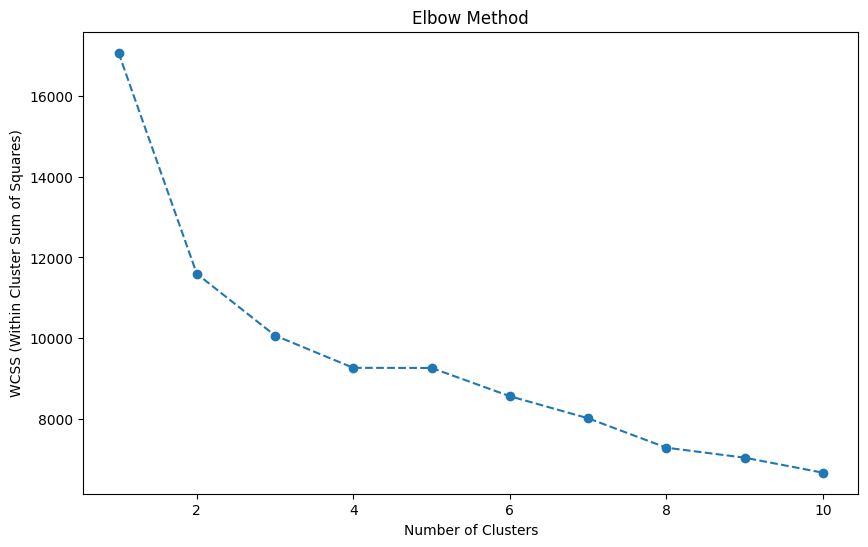

In [28]:
# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.title('Elbow Method')
plt.show()

In [29]:
# Training the k-means clustering model with k=2
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

In [30]:
# Adding cluster labels to the original dataset
data['Cluster'] = clusters

## Evaluation
### Confusion Matrix

In [31]:
# Confusion Matrix
y_true = cancer.target
cm = confusion_matrix(y_true, clusters)

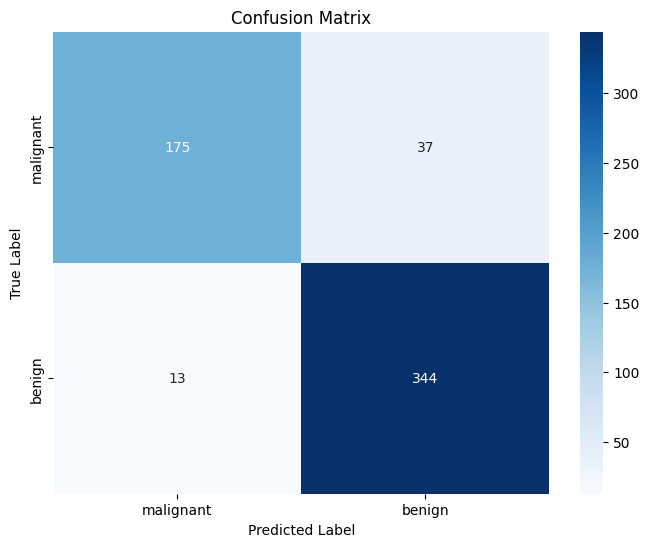

In [32]:
# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Visualizing the clusters

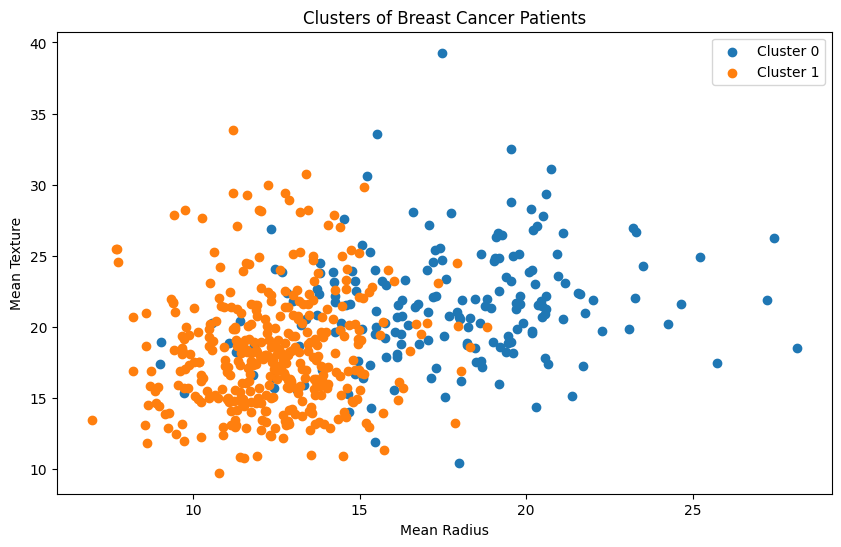

In [33]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
for cluster in data['Cluster'].unique():
    plt.scatter(data[data['Cluster'] == cluster]['mean radius'],
                data[data['Cluster'] == cluster]['mean texture'],
                label=f'Cluster {cluster}')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Clusters of Breast Cancer Patients')
plt.legend()
plt.show()

MarkDown:
In order for the algorithm to work following commands have to be executed.<br> 
*pip install numpy*<br> 
*pip install pandas*<br>
*pip install matplotlib*<br>
*pip install scikit-learn*<br> 